In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
data = pd.read_excel(r"/content/heart_disease.xlsx", sheet_name = 'Heart_disease')

In [ ]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
data.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
data.duplicated().sum()

np.int64(1)

In [ ]:
data.drop_duplicates(keep='first', inplace = True)

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
  data['oldpeak'].isnull().sum()/(data.shape[0]) * 100

np.float64(6.835722160970231)

In [ ]:
data['oldpeak'].fillna(data['oldpeak'].median(), inplace = True)

In [ ]:
data.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


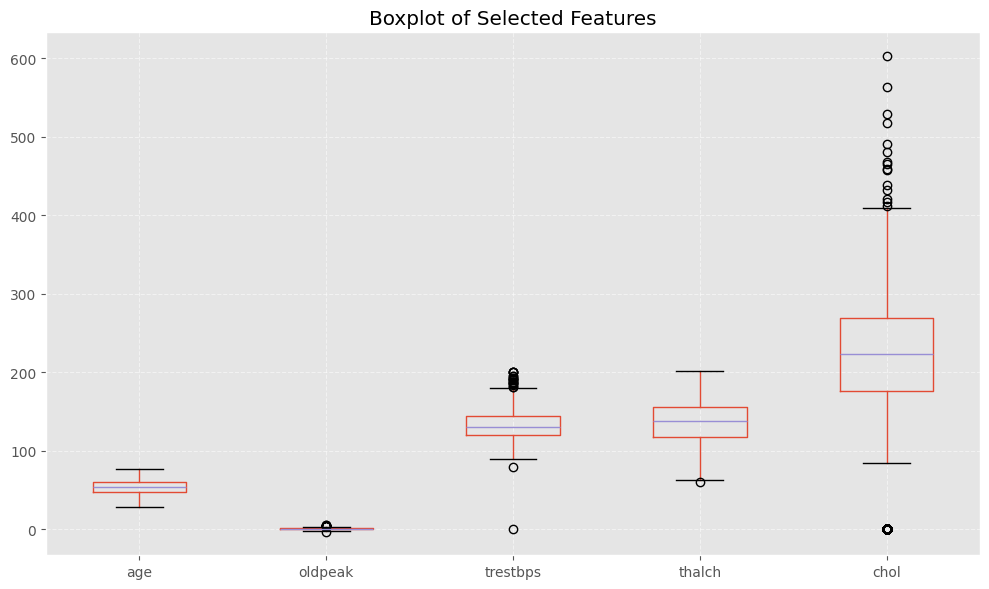

In [ ]:
plt.figure(figsize=(10, 6))
data.boxplot(['age', 'oldpeak', 'trestbps', 'thalch', 'chol'])
plt.title('Boxplot of Selected Features')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
data.nunique()

,0
age,49
sex,2
cp,4
trestbps,85
chol,228
fbs,2
restecg,3
thalch,122
exang,4
oldpeak,53


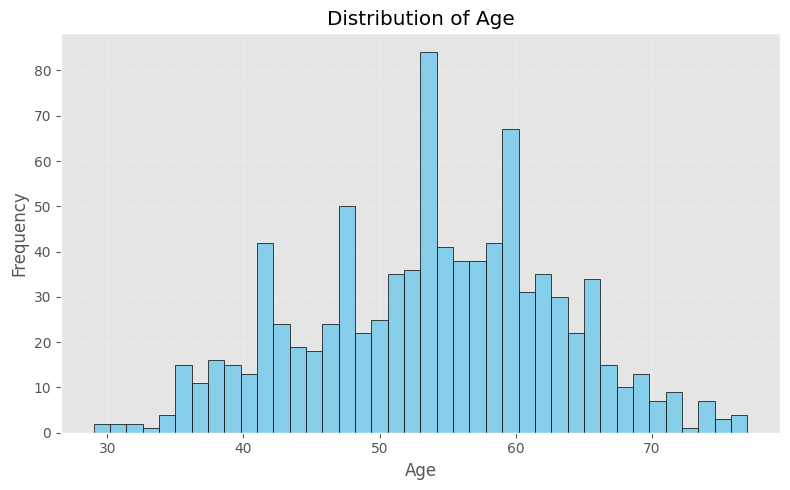

In [ ]:
ages = data['age'].values

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(ages, bins=40, color='skyblue', edgecolor='black')
ax.set_title('Distribution of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

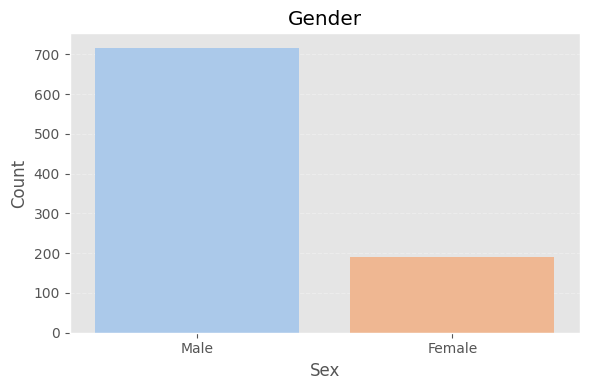

In [ ]:
gender_counts = data['sex'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


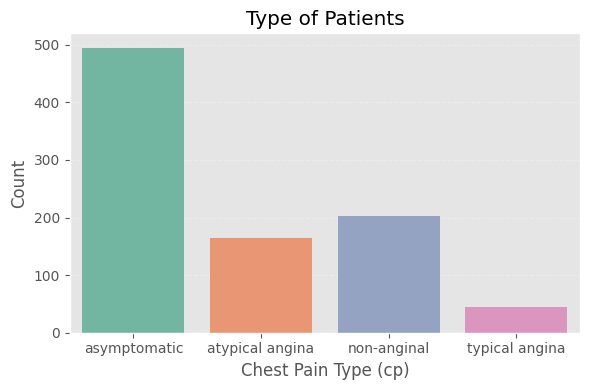

In [ ]:
cp_counts = data['cp'].value_counts().sort_index()


plt.figure(figsize=(6, 4))
sns.barplot(x=cp_counts.index.astype(str), y=cp_counts.values, palette='Set2')


plt.title('Type of Patients')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

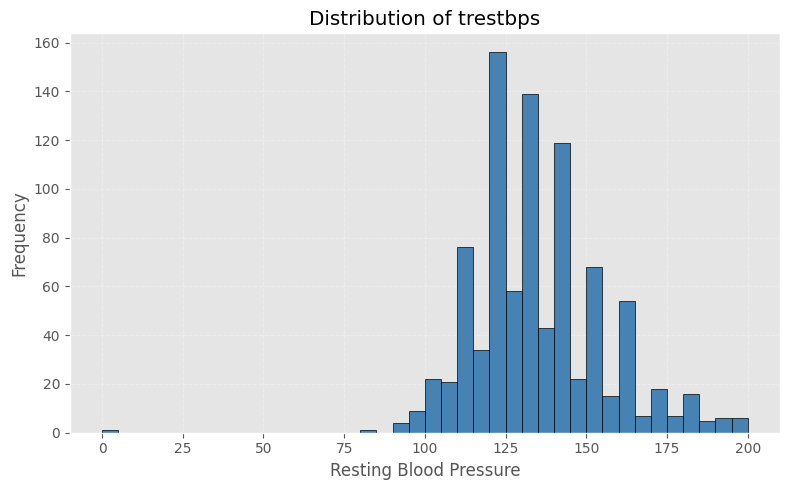

In [ ]:
bp_values = data['trestbps']

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(bp_values, bins=40, color='steelblue', edgecolor='black')
ax.set_title('Distribution of trestbps')
ax.set_xlabel('Resting Blood Pressure')
ax.set_ylabel('Frequency')
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

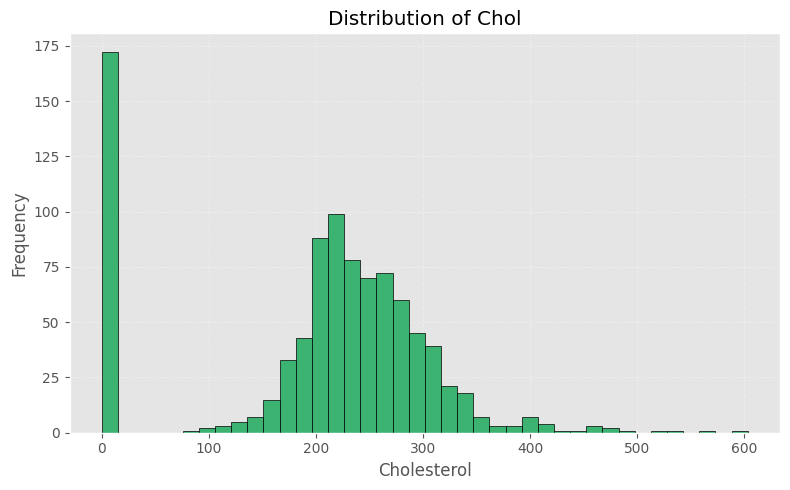

In [ ]:
chol_data = data['chol']

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(chol_data, bins=40, color='mediumseagreen', edgecolor='black')
ax.set_title('Distribution of Chol')
ax.set_xlabel('Cholesterol')
ax.set_ylabel('Frequency')
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

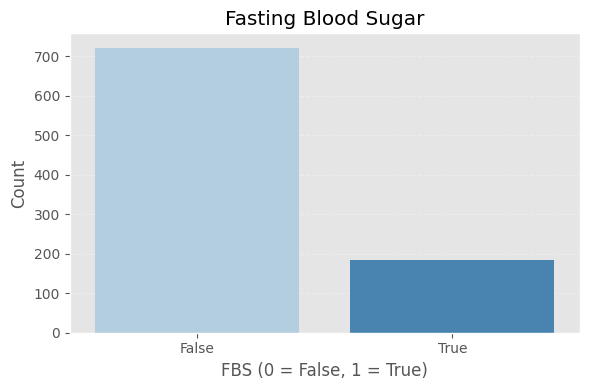

In [ ]:
fbs_counts = data['fbs'].value_counts().sort_index()


plt.figure(figsize=(6, 4))
sns.barplot(x=fbs_counts.index.astype(str), y=fbs_counts.values, palette='Blues')


plt.title('Fasting Blood Sugar')
plt.xlabel('FBS (0 = False, 1 = True)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

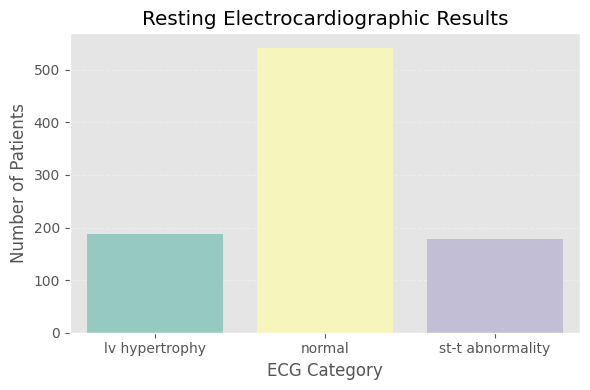

In [ ]:
ecg_counts = data['restecg'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=ecg_counts.index.astype(str), y=ecg_counts.values, palette='Set3')

plt.title('Resting Electrocardiographic Results')
plt.xlabel('ECG Category')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

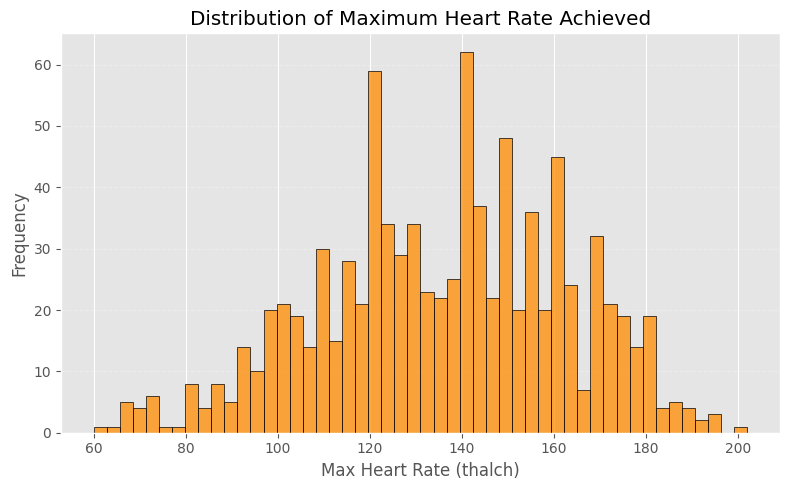

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['thalch'], bins=50, color='darkorange', edgecolor='black', kde=False)


plt.title('Distribution of Maximum Heart Rate Achieved')
plt.xlabel('Max Heart Rate (thalch)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
data['exang'] = data['exang'].replace({'TURE' : True , 'FALSE' : False})


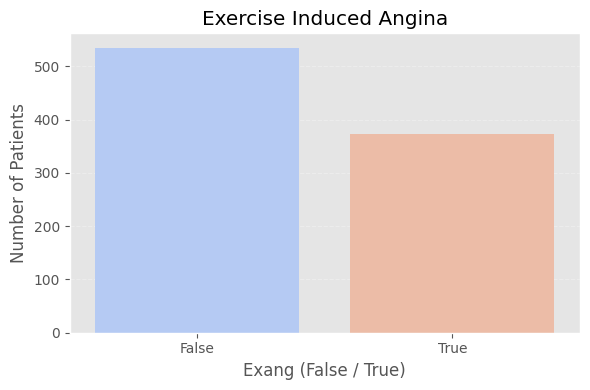

In [ ]:
exang_counts = data['exang'].value_counts().sort_index()


plt.figure(figsize=(6, 4))
sns.barplot(x=exang_counts.index.astype(str), y=exang_counts.values, palette='coolwarm')


plt.title('Exercise Induced Angina')
plt.xlabel('Exang (False / True)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

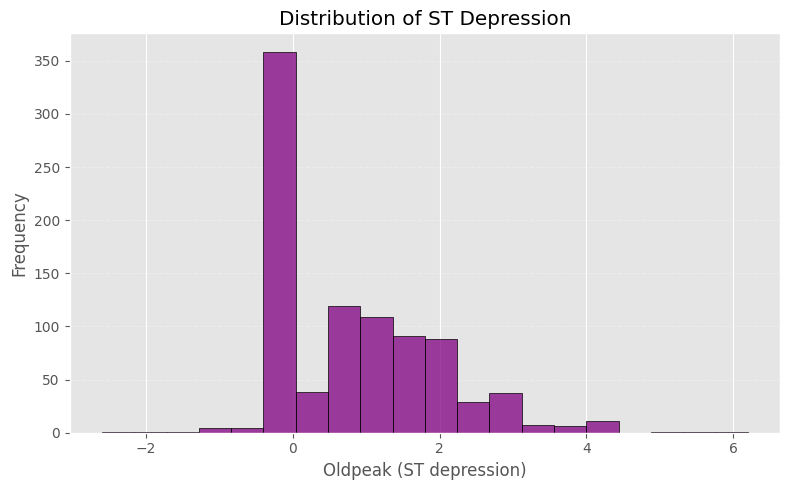

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['oldpeak'], bins=20, color='purple', edgecolor='black', kde=False)
plt.title('Distribution of ST Depression')
plt.xlabel('Oldpeak (ST depression)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

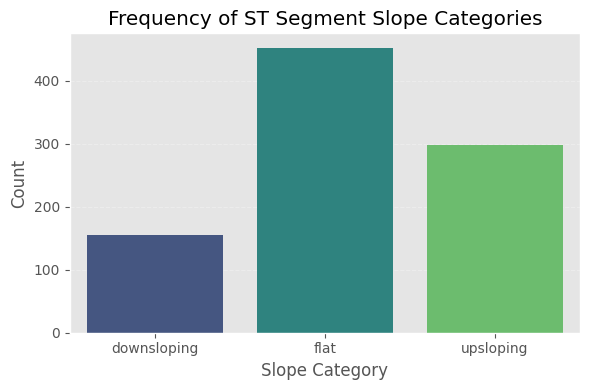

In [ ]:
slope_counts = data['slope'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=slope_counts.index.astype(str), y=slope_counts.values, palette='viridis')


plt.title('Frequency of ST Segment Slope Categories')
plt.xlabel('Slope Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

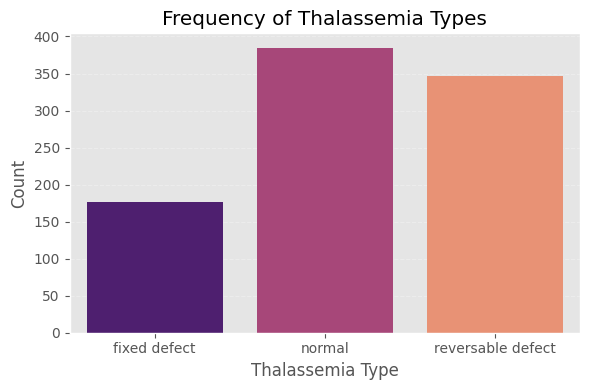

In [ ]:
thal_counts = data['thal'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=thal_counts.index.astype(str), y=thal_counts.values, palette='magma')

plt.title('Frequency of Thalassemia Types')
plt.xlabel('Thalassemia Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

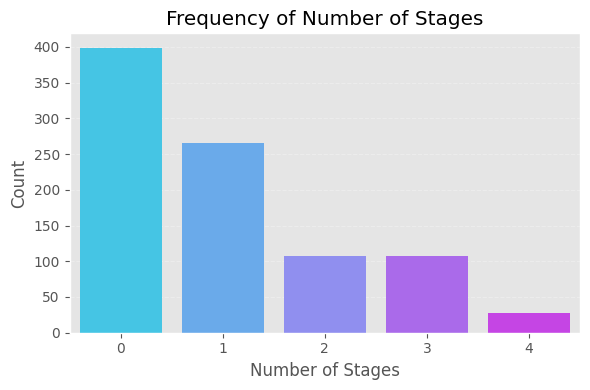

In [ ]:
num_counts = data['num'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=num_counts.index.astype(str), y=num_counts.values, palette='cool')

plt.title('Frequency of Number of Stages')
plt.xlabel('Number of Stages')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

<Axes: >

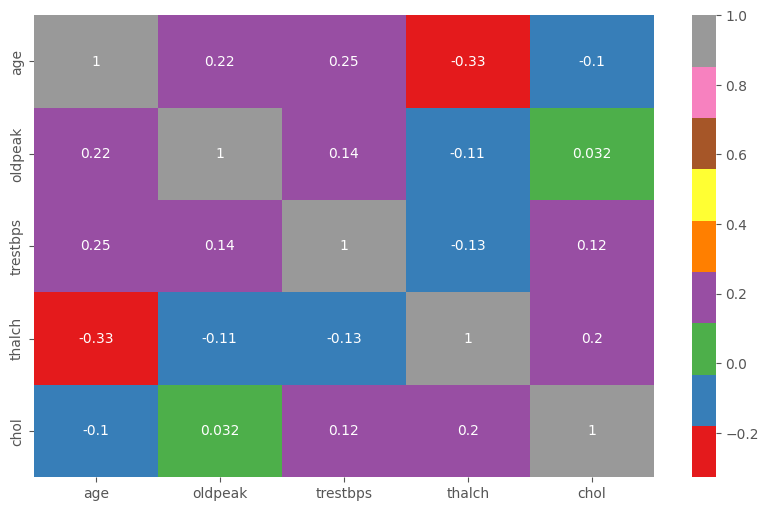

In [ ]:
sns.heatmap(data[['age','oldpeak','trestbps','thalch','chol']].corr(), annot = True, cmap = 'Set1')

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,0.5,downsloping,fixed defect,4


In [ ]:
print(data[['fbs', 'exang']].isnull().sum())  # NaN count
print(np.isinf(data[['fbs', 'exang']]).sum()) # inf count

fbs      0
exang    0
dtype: int64
fbs      0
exang    0
dtype: int64


In [ ]:
data[['fbs', 'exang']] = data[['fbs', 'exang']].fillna(0)
data.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
data[['fbs', 'exang']] = data[['fbs', 'exang']].astype(int)

In [ ]:
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
encode_col = ['sex','restecg','cp','slope','thal']
data = pd.get_dummies(data, columns = encode_col, drop_first = True).astype(int)

In [ ]:
data

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Male,restecg_normal,restecg_st-t abnormality,cp_atypical angina,cp_non-anginal,cp_typical angina,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,1,150,0,2,0,1,0,0,0,0,1,0,0,0,0
1,41,135,203,0,132,0,0,0,1,1,0,1,0,0,1,0,0,0
2,57,140,192,0,148,0,0,0,1,1,0,0,0,0,1,0,0,0
3,52,118,186,0,190,0,0,0,1,0,0,0,0,1,1,0,0,0
4,57,110,201,0,126,1,1,0,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,0,120,0,1,4,1,1,0,0,0,0,0,1,0,1
904,62,166,170,0,120,1,3,4,1,0,1,0,0,0,1,0,0,1
905,56,170,0,0,123,1,2,4,1,0,0,0,1,0,0,0,1,0
906,56,144,208,1,105,1,0,4,1,0,1,0,1,0,0,0,0,0


In [ ]:
x = data.drop('num', axis = 1)
y = data[['num']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42)

In [ ]:
x_train = pd.get_dummies(x_train, drop_first=True)

In [ ]:
print(x_train.dtypes)

age                         int64
trestbps                    int64
chol                        int64
fbs                         int64
thalch                      int64
exang                       int64
oldpeak                     int64
sex_Male                    int64
restecg_normal              int64
restecg_st-t abnormality    int64
cp_atypical angina          int64
cp_non-anginal              int64
cp_typical angina           int64
slope_flat                  int64
slope_upsloping             int64
thal_normal                 int64
thal_reversable defect      int64
dtype: object


In [ ]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt.predict(x_test)

In [ ]:
print(f'Training Accuracy : {dt.score(x_train, y_train)}')

Training Accuracy : 1.0


In [ ]:
print(f'Testing Accuracy : {dt.score(x_test, y_test)}')

Testing Accuracy : 0.5054945054945055


In [ ]:
x_test

,age,trestbps,chol,fbs,thalch,exang,oldpeak,sex_Male,restecg_normal,restecg_st-t abnormality,cp_atypical angina,cp_non-anginal,cp_typical angina,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
869,49,137,142,0,68,0,0,1,1,0,0,1,0,1,0,1,0
439,58,170,0,1,105,1,0,1,0,1,0,0,0,0,0,1,0
342,41,120,291,0,160,0,0,1,0,1,1,0,0,0,0,1,0
735,60,132,218,0,140,1,1,1,0,1,0,0,0,0,0,1,0
785,54,110,206,0,108,1,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,38,110,265,0,150,1,1,1,1,0,0,0,0,1,0,1,0
868,65,126,312,0,156,0,0,1,0,0,0,0,0,0,0,1,0
445,53,140,203,1,155,1,3,1,0,0,0,0,0,0,0,0,1
786,54,122,286,0,116,1,3,1,0,0,0,0,0,1,0,1,0


In [ ]:
x_train

,age,trestbps,chol,fbs,thalch,exang,oldpeak,sex_Male,restecg_normal,restecg_st-t abnormality,cp_atypical angina,cp_non-anginal,cp_typical angina,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
84,42,120,295,0,162,0,0,1,1,0,1,0,0,0,1,1,0
10,30,170,237,0,170,0,0,0,0,1,0,0,1,0,0,0,0
616,58,160,211,1,92,0,0,1,0,1,0,1,0,0,1,0,0
250,41,104,0,0,111,0,0,1,0,1,0,0,0,1,0,1,0
478,64,142,276,0,140,1,1,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,63,135,252,0,172,0,0,0,0,0,0,1,0,0,1,1,0
270,37,120,260,0,130,0,0,0,1,0,1,0,0,0,0,0,0
861,55,172,260,0,73,0,2,1,1,0,0,0,0,0,0,1,0
435,57,154,232,0,164,0,0,1,0,0,1,0,0,0,1,1,0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73        89
           1       0.35      0.43      0.38        47
           2       0.21      0.20      0.21        20
           3       0.17      0.18      0.17        17
           4       0.43      0.33      0.38         9

    accuracy                           0.51       182
   macro avg       0.38      0.37      0.37       182
weighted avg       0.52      0.51      0.51       182



In [ ]:
params = {
    'criterion' : ['entropy','gini'],
    'max_depth' : [3,5,7,9,11],
    'splitter' :['best','random']
}

In [ ]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params,
                   verbose=1)

In [ ]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}

In [ ]:
dtr = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='best', random_state=42)

In [ ]:
dtr.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred_1 = dtr.predict(x_test)

In [ ]:
dtr.score(x_train,y_train),dtr.score(x_test,y_test)

(0.593103448275862, 0.5274725274725275)

In [ ]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        89
           1       0.40      0.43      0.41        47
           2       0.11      0.05      0.07        20
           3       0.08      0.12      0.10        17
           4       0.00      0.00      0.00         9

    accuracy                           0.53       182
   macro avg       0.27      0.28      0.27       182
weighted avg       0.48      0.53      0.50       182



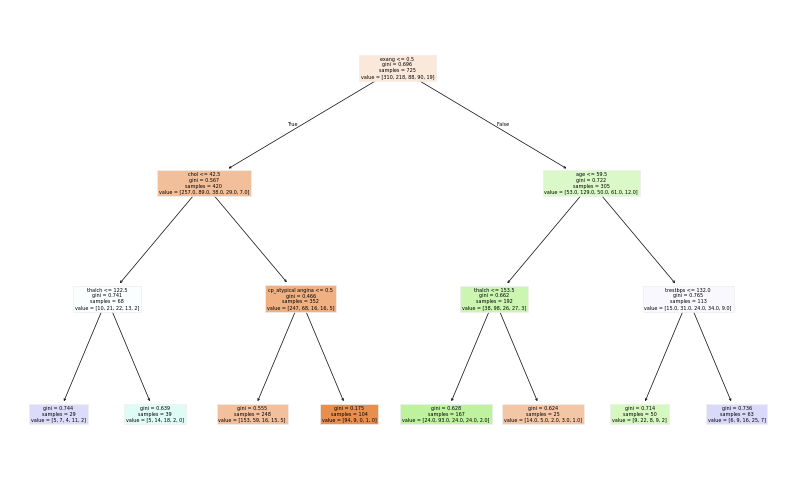

In [ ]:
tree.plot_tree(dtr, feature_names=x.columns, filled=True);

Interview Question :**bold text**

1) . What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Ans->
1) max_depth – Sets how deep the tree can go. A smaller depth avoids overfitting, while a very deep tree may overfit the data.

2) min_samples_split – Minimum number of samples required to split a node. Higher values make the model simpler and reduce overfitting.

3) min_samples_leaf – Minimum number of samples needed at a leaf node. Helps make the model more general and stable.

4) max_features – Limits the number of features considered at each split. Useful to reduce model complexity and training time.

5) criterion – Decides how the tree splits (e.g., "gini" or "entropy"). It affects the way the tree chooses the best feature for splitting.



2) . What is the difference between the Label encoding and One-hot encoding?

Ans->
1) Label Encoding gives each category a unique number (like A=0, B=1, C=2).

2) One-Hot Encoding creates a new column for each category with values 0 or 1 (presence or absence).

3) Label Encoding may create a false sense of order between categories, which can confuse the model.

4) One-Hot Encoding avoids this issue by treating each category as separate and independent.

5) Use Label Encoding when the categories have a natural order, and One-Hot Encoding when they don’t.

